In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm
import scipy as sc

In [2]:
dataset = pd.read_csv('Daten.csv', delimiter=";")
dataset.info()
dataset.shape 
## hier gibt es fehlende Daten in den Columns "x3", "x4" und "x6"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4000 non-null   float64
 1   x2      4000 non-null   float64
 2   x3      3999 non-null   float64
 3   x4      3999 non-null   float64
 4   x5      4000 non-null   int64  
 5   x6      3998 non-null   object 
 6   y       4000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 218.9+ KB


(4000, 7)

In [3]:
dataset.head()

,x1,x2,x3,x4,x5,x6,y
0,41.976,6.307,34.376,0.214,1,rot,-0.909
1,129.615,13.146,1.955,0.959,0,rot,16.593
2,228.441,28.289,38.486,0.513,1,blau,2.084
3,167.988,25.258,18.643,0.996,1,blau,2.907
4,161.769,19.491,20.413,20.847,0,gelb,8.545


###Aufgabe 1

1.   Identifizieren Sie Ausreißer. Berechnen Sie dazu den Z-Score und löschen Sie alle Datensätze, die Ausreißer enthalten.
2.   Wie gehen Sie mit den fehlenden Werten um?



In [4]:
df = dataset.copy() 

In [5]:
label = df["y"]

In [6]:
df.drop(["x5","x6","y"],axis = 1,inplace = True) ## y , x5 und x6 werden aus dem Dataframe entfernt, weil x5 und x6 kategoriale Variablen
## und y unser label

In [7]:
df.head()

,x1,x2,x3,x4
0,41.976,6.307,34.376,0.214
1,129.615,13.146,1.955,0.959
2,228.441,28.289,38.486,0.513
3,167.988,25.258,18.643,0.996
4,161.769,19.491,20.413,20.847


In [8]:
df.describe()

,x1,x2,x3,x4
count,4000.000000,4000.000000,3999.000000,3999.000000
mean,127.564325,22.459898,21.217701,0.567224
std,73.619304,19.076627,12.145571,0.535712
min,-190.595000,0.398000,0.011000,-2.953000
25%,64.652750,16.754000,10.820500,0.394000
50%,127.362500,23.637500,21.062000,0.694000
75%,190.778750,28.785500,31.799000,0.877000
max,255.963000,1123.613000,41.964000,20.847000


In [9]:
dataset["x6"] = dataset.apply(lambda x : x.fillna(x.value_counts().index[0]))["x6"]

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      4000 non-null   float64
 1   x2      4000 non-null   float64
 2   x3      3999 non-null   float64
 3   x4      3999 non-null   float64
 4   x5      4000 non-null   int64  
 5   x6      4000 non-null   object 
 6   y       4000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 218.9+ KB


In [11]:
df["x3"].fillna(np.mean(df["x3"],axis = 0),inplace =True) ##fehlende Daten werden mit Mean aufgefüllt. 

In [12]:
df["x4"].fillna(np.mean(df["x4"],axis = 0),inplace =True)

In [13]:
def outlier_detection(arr): ##hier werden alle Ausreißer festgestellt und gelöscht.
    ## wenn ein Wert innerhalb des Durchschnitt - 3* Standardabweichung und Durchschnitt + 3* Standardabweichung ist, dann
    ## ist er kein Ausreißer
    temp = [i for i,e in enumerate(arr) if not ((e > arr.mean() - 3*arr.std()) and (e < arr.mean() + 3*arr.std())) ]
    return temp

In [14]:
outlier_list = []

In [15]:
features = ["x1","x2","x3","x4"] ## hier werden alle unabhängigen Variablen untersucht, um Ausreißer zu erkennen.
for i in features : 
    outlier = outlier_detection(df[i])
    print(outlier)
    if len(outlier) > 0 : 
        for j in outlier : 
            outlier_list.append(j)

[84]
[80]
[]
[4, 32, 607, 632, 958, 1011, 1284, 1294, 1326, 1489, 1625, 1682, 1771, 1841, 1898, 2625, 2905, 2919, 2971, 2985, 3055, 3121, 3137, 3348, 3631, 3831]


In [16]:
outlier_list 

[84,
 80,
 4,
 32,
 607,
 632,
 958,
 1011,
 1284,
 1294,
 1326,
 1489,
 1625,
 1682,
 1771,
 1841,
 1898,
 2625,
 2905,
 2919,
 2971,
 2985,
 3055,
 3121,
 3137,
 3348,
 3631,
 3831]

In [17]:
df.drop(index = outlier_list,axis = 0,inplace = True) ## hier werden alle Ausreißer aus df gelöscht. 

In [18]:
label.drop(index = outlier_list,axis = 0 ,inplace = True) ## und wir sollen auch y Werte von Ausreißer entfernen

In [19]:
df["x5"] = dataset["x5"]

In [20]:
df

,x1,x2,x3,x4,x5
0,41.976,6.307,34.376,0.214,1
1,129.615,13.146,1.955,0.959,0
2,228.441,28.289,38.486,0.513,1
3,167.988,25.258,18.643,0.996,1
5,18.750,30.176,2.612,0.500,1
...,...,...,...,...,...
3995,73.060,24.379,8.265,0.466,0
3996,191.202,17.907,11.820,-0.054,0
3997,17.828,3.927,30.927,0.206,0
3998,73.751,31.585,12.433,-0.984,1


##Aufgabe 2
Transformieren Sie die Kategorien der Variablen x5 (gelb, blau, rot) mittels Dummy-Encoding in drei Binärvariablen

In [21]:
encoded_dataset = pd.get_dummies(dataset,columns = ["x6"])
encoded_dataset.drop(index = outlier_list,axis = 0,inplace = True)

In [22]:
encoded_dataset

,x1,x2,x3,x4,x5,y,x6_blau,x6_gelb,x6_rot
0,41.976,6.307,34.376,0.214,1,-0.909,False,False,True
1,129.615,13.146,1.955,0.959,0,16.593,False,False,True
2,228.441,28.289,38.486,0.513,1,2.084,True,False,False
3,167.988,25.258,18.643,0.996,1,2.907,True,False,False
5,18.750,30.176,2.612,0.500,1,0.534,True,False,False
...,...,...,...,...,...,...,...,...,...
3995,73.060,24.379,8.265,0.466,0,14.337,True,False,False
3996,191.202,17.907,11.820,-0.054,0,-6.455,True,False,False
3997,17.828,3.927,30.927,0.206,0,2.839,False,False,True
3998,73.751,31.585,12.433,-0.984,1,12.422,True,False,False


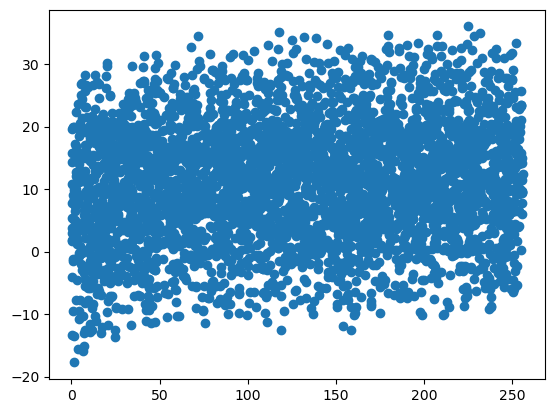

In [23]:
plt.scatter(df['x1'], label)

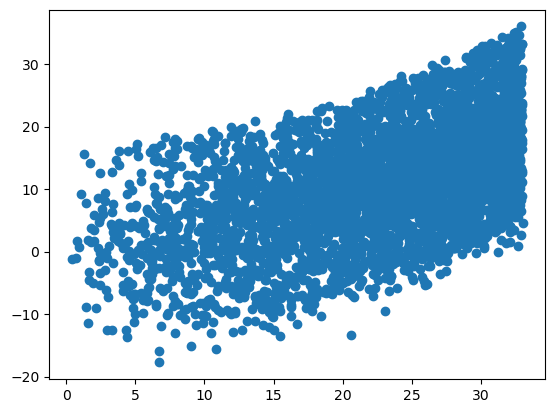

In [24]:
plt.scatter(df['x2'], label)

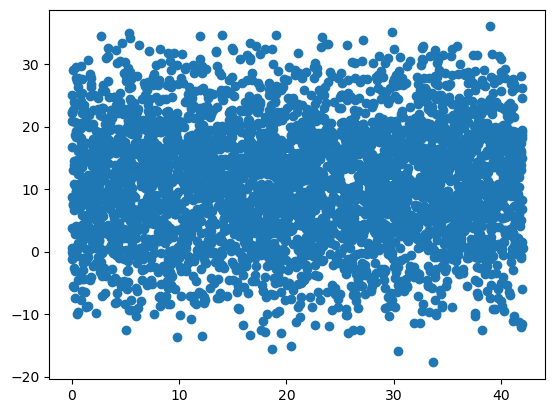

In [25]:
plt.scatter(df['x3'], label)

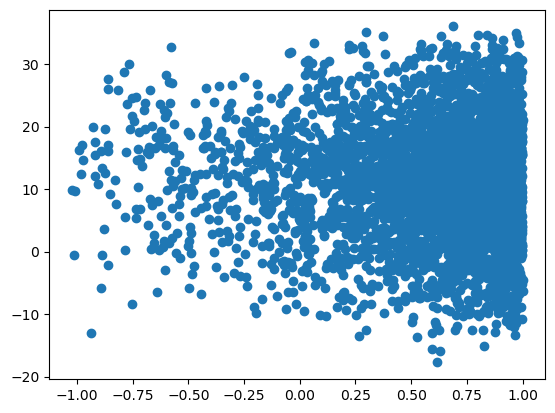

In [26]:
plt.scatter(df['x4'], label)

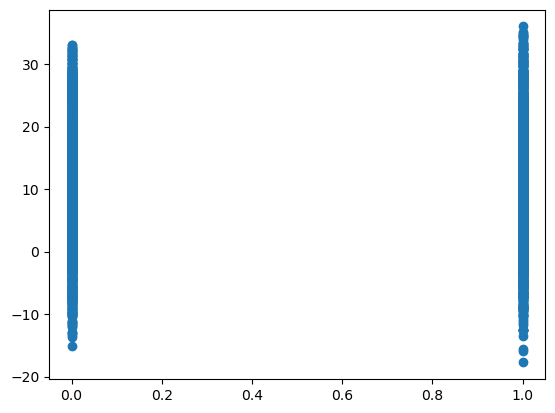

In [27]:
plt.scatter(df['x5'], label)

##Aufgabe 3


1.   Erstellen Sie eine Korrelationsmatrix.
2.   Bewerten Sie die Korrelation.



In [43]:
df["x6_blau"] = np.array(encoded_dataset["x6_blau"]).astype("I")
df["x6_gelb"] = np.array(encoded_dataset["x6_gelb"]).astype("I")
df["x6_rot"] = np.array(encoded_dataset["x6_rot"]).astype("I")
df["label"] = label

In [44]:
df

,x1,x2,x3,x4,x5,x6_blau,x6_gelb,x6_rot,label
0,41.976,6.307,34.376,0.214,1,0,0,1,-0.909
1,129.615,13.146,1.955,0.959,0,0,0,1,16.593
2,228.441,28.289,38.486,0.513,1,1,0,0,2.084
3,167.988,25.258,18.643,0.996,1,1,0,0,2.907
5,18.750,30.176,2.612,0.500,1,1,0,0,0.534
...,...,...,...,...,...,...,...,...,...
3995,73.060,24.379,8.265,0.466,0,1,0,0,14.337
3996,191.202,17.907,11.820,-0.054,0,1,0,0,-6.455
3997,17.828,3.927,30.927,0.206,0,0,0,1,2.839
3998,73.751,31.585,12.433,-0.984,1,1,0,0,12.422


In [45]:
import seaborn as sns
import matplotlib as mpl

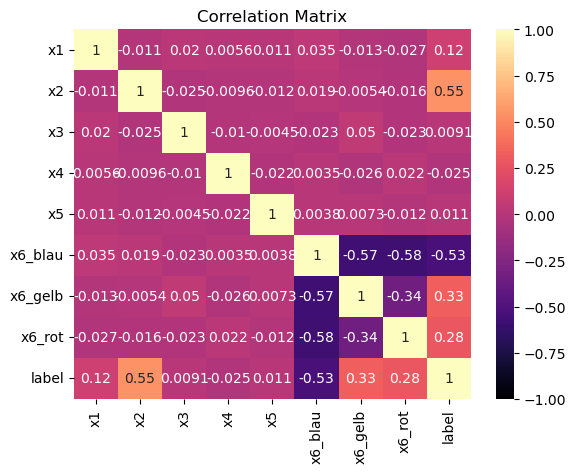

'\n>>>Hier kann ich sagen ,dass eine lineare Beziehung zwischen der unabhängige Variablen "x2" "x6_blau" "x6_gelb", "x6_rot" \n    und der abhängige Variable.\n    \n>>> x2 , x6_gelb und x6_rot sind positiv korreliert mit label.\n>>> x6_blau und label sind negativ korreliert \n>>> "x1" hat auch eine positive Beziehung mit label, aber sie ist sehr niedrig.\n>>> Alle andere haben nur geringe lineare Beziehung auf label.\n\n>>> x6_blau hat auch negative Korrelation mit x6_gelb und x6_rot (-0.57,-0.58)\n>>> x6_gelb hat eine negative Korrelation mit x6_rot (-0.34).\n\n>>> Es gibt keine Multikollinearität. (zu hoch korreliert größer als 0.75 oder kleiner als -0.75)\n'

In [46]:
sns.heatmap(df.corr(), annot=True, cmap= mpl.cm.magma , vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
"""
>>>Hier kann ich sagen ,dass eine lineare Beziehung zwischen der unabhängige Variablen "x2" "x6_blau" "x6_gelb", "x6_rot" 
    und der abhängige Variable.
    
>>> x2 , x6_gelb und x6_rot sind positiv korreliert mit label.
>>> x6_blau und label sind negativ korreliert 
>>> "x1" hat auch eine positive Beziehung mit label, aber sie ist sehr niedrig.
>>> Alle andere haben nur geringe lineare Beziehung auf label.

>>> x6_blau hat auch negative Korrelation mit x6_gelb und x6_rot (-0.57,-0.58)
>>> x6_gelb hat eine negative Korrelation mit x6_rot (-0.34).

>>> Es gibt keine Multikollinearität. (zu hoch korreliert größer als 0.75 oder kleiner als -0.75)
"""

##Aufgabe 4
Erstellen Sie eine multiple lineare Regression mit den Inputwerten. Achten Sie dabei darauf, dass die Variablen aus dem Dummy-Encoding eine multikollineare Abhängigkeit aufweisen, so dass Sie nur zwei der drei Variablen verwenden dürfen.

In [48]:
import statsmodels.api as sm
data_x = df.drop(columns = ['label'])
data_y = label
model = sm.OLS(data_y,data_x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     888.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:16:17   Log-Likelihood:                -12668.
No. Observations:                3972   AIC:                         2.535e+04
Df Residuals:                    3964   BIC:                         2.540e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0179      0.001     14.112      0.000       0.015       0.020
x2             0.6744      0.012     56.283      0.000       0.651       0.698
x3             0.0050      0.008      0.646      0.518      -0.010       0.020
x4            -0.4153      0.235     -1.770      0.077      -0.875       0.045
x5             0.3253      0.187      1.743      0.081      -0.041       0.691
x6_blau      -11.4807      0.416    -27.588      0.000     -12.297     -10.665
x6_gelb       -0.9087      0.435     -2.087      0.037      -1.762      -0.055
x6_rot        -1.5393      0.430     -3.579      0.000      -2.383      -0.696
==============================================================================
Omnibus:                     1421.768   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.542
Skew:                          -0.003   Prob(JB):                     9.39e-43
Kurtosis:                       1.919   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Aufgabe 5
Wie sind die Ergebnisse zu interpretieren?

In [49]:
"""
R^2 ist 0.611 , dieser Wert ist kein gutes Ergebnis.
Wenn wir an die t-Werte schauen, sehen wir, dass keine unabhängigen Variablen außerhalb x1 und x2 einen signifikanten Einfluss
auf das Zielvariable haben. Außerdem sind die p-Werte der Variablen außer x3 , x4 und x5 kleiner als 0.05. Damit können wir
von einem signifikanten Einfluss sprechen

"""

'\nR^2 ist 0.611 , dieser Wert ist kein gutes Ergebnis.\nWenn wir an die t-Werte schauen, sehen wir, dass keine unabhängigen Variablen außerhalb x1 und x2 einen signifikanten Einfluss\nauf das Zielvariable haben. Außerdem sind die p-Werte der Variablen außer x3 , x4 und x5 kleiner als 0.05. Damit können wir\nvon einem signifikanten Einfluss sprechen\n\n'

##Aufgabe 6
Erstellen Sie zur Lösung des Problems ein dreischichtiges Multi Layer Perceptron.
Verändern Sie die Anzahl der Neuronen (z.B. 10 und 30) der versteckten Schicht und verwenden Sie zwei verschiedene Aktivierungsfunktionen ('sigmoid' und 'relu') und vergleichen Sie die Ergebnisse.

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state = 0)
X_train.shape

(3177, 8)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model.add(Dense(X_train.shape[1]))

#Verstecktes Layer
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
#Outputlayer mit einem Neuronen
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

In [58]:
r = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=256,
              epochs=2000)

Epoch 1/2000
13/13 [==============================] - 1s 15ms/step - loss: 81.4973 - val_loss: 67.6512
Epoch 2/2000
13/13 [==============================] - 0s 5ms/step - loss: 65.8162 - val_loss: 61.6670
Epoch 3/2000
13/13 [==============================] - 0s 5ms/step - loss: 62.9098 - val_loss: 59.8466
Epoch 4/2000
13/13 [==============================] - 0s 6ms/step - loss: 61.7215 - val_loss: 60.0036
Epoch 5/2000
13/13 [==============================] - 0s 5ms/step - loss: 60.9523 - val_loss: 58.3508
Epoch 6/2000
13/13 [==============================] - 0s 5ms/step - loss: 60.5626 - val_loss: 58.1371
Epoch 7/2000
13/13 [==============================] - 0s 5ms/step - loss: 59.7585 - val_loss: 58.1009
Epoch 8/2000
13/13 [==============================] - 0s 5ms/step - loss: 59.4089 - val_loss: 57.1001
Epoch 9/2000
13/13 [==============================] - 0s 6ms/step - loss: 58.7466 - val_loss: 56.4546
Epoch 10/2000
13/13 [==============================] - 0s 5ms/step - loss: 58.857

In [59]:
yn_train_pred = model.predict(X_train)
yn_test_pred = model.predict(X_test)

print('Trainingsdaten')
print('MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred))
print('MSE: ', metrics.mean_squared_error(y_train, yn_train_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred)))
print('R2: ', metrics.r2_score(y_train, yn_train_pred))
print('')
print('Testdaten')
print('MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred))
print('MSE: ', metrics.mean_squared_error(y_test, yn_test_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred)))
print('R2: ', metrics.r2_score(y_test, yn_test_pred))

25/25 [==============================] - 0s 1ms/step
Trainingsdaten
MAE:  4.846972670274746
MSE:  31.960362509334143
RMSE:  5.65334967159596
R2:  0.6413689313483704

Testdaten
MAE:  5.149420739637381
MSE:  36.242046211708335
RMSE:  6.020136726994523
R2:  0.5805689337953688


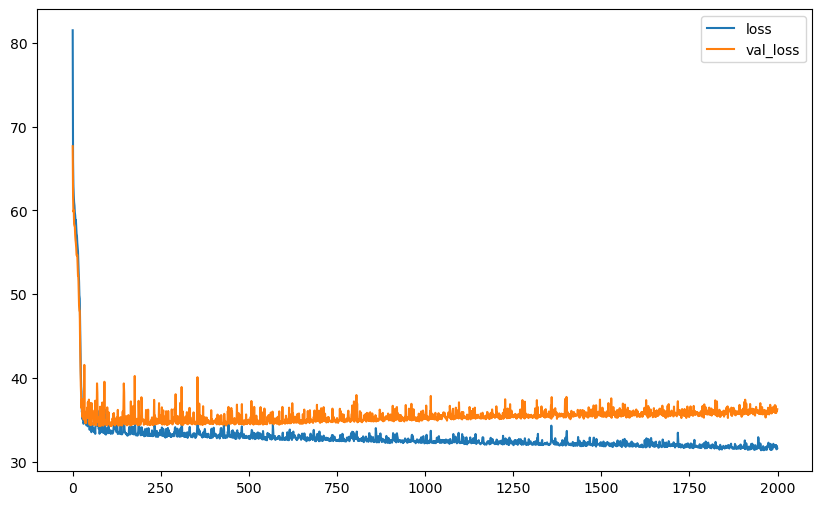

In [61]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style = 'plain')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [62]:
model.add(Dense(X_train.shape[1]))

#Verstecktes Layer
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
#Outputlayer mit einem Neuronen
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

In [63]:
r = model.fit(X_train, y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=256,
              epochs=2000)

Epoch 1/2000
13/13 [==============================] - 2s 18ms/step - loss: 190.8271 - val_loss: 172.4337
Epoch 2/2000
13/13 [==============================] - 0s 6ms/step - loss: 177.7905 - val_loss: 160.2797
Epoch 3/2000
13/13 [==============================] - 0s 6ms/step - loss: 165.5770 - val_loss: 149.5717
Epoch 4/2000
13/13 [==============================] - 0s 5ms/step - loss: 155.0503 - val_loss: 140.2026
Epoch 5/2000
13/13 [==============================] - 0s 6ms/step - loss: 145.7802 - val_loss: 132.1228
Epoch 6/2000
13/13 [==============================] - 0s 6ms/step - loss: 137.6870 - val_loss: 125.3722
Epoch 7/2000
13/13 [==============================] - 0s 6ms/step - loss: 130.8747 - val_loss: 119.2943
Epoch 8/2000
13/13 [==============================] - 0s 7ms/step - loss: 124.8816 - val_loss: 114.1656
Epoch 9/2000
13/13 [==============================] - 0s 5ms/step - loss: 119.7692 - val_loss: 109.7777
Epoch 10/2000
13/13 [==============================] - 0s 6ms/s

In [64]:
yn_train_pred = model.predict(X_train)
yn_test_pred = model.predict(X_test)

print('Trainingsdaten')
print('MAE: ', metrics.mean_absolute_error(y_train, yn_train_pred))
print('MSE: ', metrics.mean_squared_error(y_train, yn_train_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred)))
print('R2: ', metrics.r2_score(y_train, yn_train_pred))
print('')
print('Testdaten')
print('MAE: ', metrics.mean_absolute_error(y_test, yn_test_pred))
print('MSE: ', metrics.mean_squared_error(y_test, yn_test_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred)))
print('R2: ', metrics.r2_score(y_test, yn_test_pred))

25/25 [==============================] - 0s 1ms/step
Trainingsdaten
MAE:  4.6827064897043735
MSE:  30.559023954914768
RMSE:  5.528021703549541
R2:  0.6570935196776602

Testdaten
MAE:  5.2646866519580096
MSE:  38.897961678797365
RMSE:  6.2368230437296655
R2:  0.549831887393429


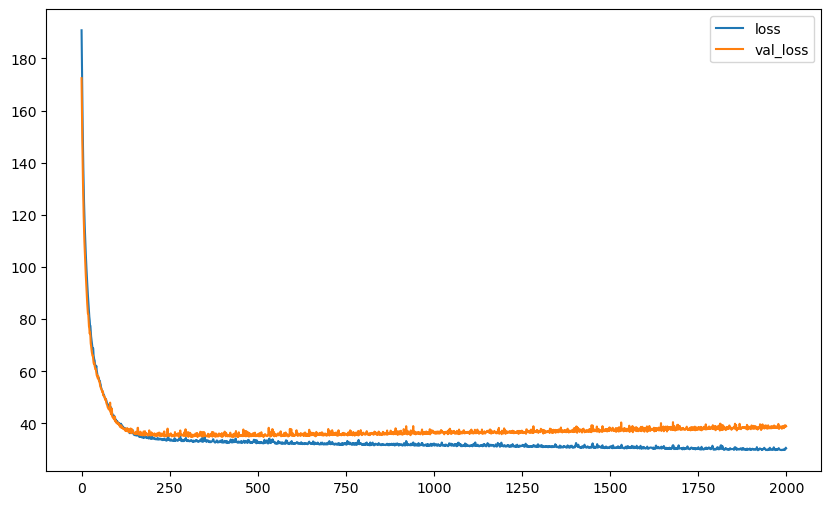

In [65]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style = 'plain')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [66]:
"""
Mit der Aktivierungsfunktion Sigmoid hat das Model sehr langsam gegen das Minimum konvergiert. ReLu ist schneller als Sigmoid,
weil Sigmoid rechenintensiv. Die Ergebnisse von diesen sind fast gleich.
"""

'\nMit der Aktivierungsfunktion Sigmoid hat das Model sehr langsam gegen das Minimum konvergiert. ReLu ist schneller als Sigmoid,\nweil Sigmoid rechenintensiv. Die Ergebnisse von diesen sind fast gleich.\n'

##Aufgabe 7
Interpretieren Sie die Ergebnisse der multiplen linearen Regression und der neuronalen Netze im Zusammenhang.

In [67]:
"""
Neurale Netze : 
Wenn man an die Graph schaut, dann merkt man, dass das Model underfitting gemacht hat, weil das Model eine höhe Verlust hat
(mse : 30). Also funktioniert das Model sowohl an den Trainingsätzen als auch an den Testsätzen nicht gut.
Darüber hinaus ist der R^2 Wert noch niedrig.

multiple lineare Regression : 
Das Egebnis der multiplen linearen Regression ist fast ähnlich wie Neurale Netze. Beide sind nicht gut. Man kann dieses Model
verbessern, indem z.B. man weitere Feature hinzufügt, die höhere Einfluss auf Zielvariable haben. 
"""

'\nNeurale Netze : \nWenn man an die Graph schaut, dann merkt man, dass das Model underfitting gemacht hat, weil das Model eine höhe Verlust hat\n(mse : 30). Also funktioniert das Model sowohl an den Trainingsätzen als auch an den Testsätzen nicht gut.\nDarüber hinaus ist der R^2 Wert noch niedrig.\n\nmultiple lineare Regression : \nDas Egebnis der multiplen linearen Regression ist fast ähnlich wie Neurale Netze. Beide sind nicht gut. Man kann dieses Model\nverbessern, indem z.B. man weitere Feature hinzufügt, die höhere Einfluss auf Zielvariable haben. \n'